# 用scikit-learn和pandas学习Ridge回归
通过 Ridge 回归的损失函数表达式可以看到，𝛼 越大，那么正则项惩罚的就越厉害，得到回归系数 𝜃 就越小，最终趋近与0。而如果 𝛼 越小，即正则化项越小，那么回归系数 𝜃 就越来越接近于普通的线性回归系数。

这里我们用 scikit-learn 来研究这种 Ridge 回归的变化，例子参考了scikit-learn的官网例子。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [3]:
print(np.arange(1, 11))
print(np.arange(0, 10)[:, np.newaxis])   

[ 1  2  3  4  5  6  7  8  9 10]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


生成一个 10x10 的矩阵 X，表示一组有 10 个样本，每个样本有 10 个特征的数据。生成一个 10x1 的向量 y 代表样本输出。

In [4]:
print(np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]
 [10 11 12 13 14 15 16 17 18 19]]


In [5]:
# X is a 10x10 matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# y is a 10 x 1 vector
y = np.ones(10)

有了数据后，接着就是准备超参数 𝛼 了。我们准备了 200 个超参数，来分别跑 Ridge 回归。
准备这么多的目的是为了后面画图看 𝛼 和 𝜃 的关系

In [6]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)  # alphas count 200, 都在10的-10次方和10的-2次方之间
print(alphas)

[1.00000000e-10 1.09698580e-10 1.20337784e-10 1.32008840e-10
 1.44811823e-10 1.58856513e-10 1.74263339e-10 1.91164408e-10
 2.09704640e-10 2.30043012e-10 2.52353917e-10 2.76828663e-10
 3.03677112e-10 3.33129479e-10 3.65438307e-10 4.00880633e-10
 4.39760361e-10 4.82410870e-10 5.29197874e-10 5.80522552e-10
 6.36824994e-10 6.98587975e-10 7.66341087e-10 8.40665289e-10
 9.22197882e-10 1.01163798e-09 1.10975250e-09 1.21738273e-09
 1.33545156e-09 1.46497140e-09 1.60705282e-09 1.76291412e-09
 1.93389175e-09 2.12145178e-09 2.32720248e-09 2.55290807e-09
 2.80050389e-09 3.07211300e-09 3.37006433e-09 3.69691271e-09
 4.05546074e-09 4.44878283e-09 4.88025158e-09 5.35356668e-09
 5.87278661e-09 6.44236351e-09 7.06718127e-09 7.75259749e-09
 8.50448934e-09 9.32930403e-09 1.02341140e-08 1.12266777e-08
 1.23155060e-08 1.35099352e-08 1.48202071e-08 1.62575567e-08
 1.78343088e-08 1.95639834e-08 2.14614120e-08 2.35428641e-08
 2.58261876e-08 2.83309610e-08 3.10786619e-08 3.40928507e-08
 3.73993730e-08 4.102658

有了这 200 个超参数 𝛼，做 200 次循环，分别求出各个超参数对应的 𝜃 (10 个维度)，存起来后面画图用。

In [10]:
ridgeReg = linear_model.Ridge(fit_intercept=False)
coefs = []
# 循环200次
for a in alphas:
    #设置本次循环的超参数
    ridgeReg.set_params(alpha=a)
    #针对每个alpha做ridge回归
    ridgeReg.fit(X, y)
    # 把每一个超参数alpha对应的theta存下来
    coefs.append(reg.coef_)

有了 200 个超参数 𝛼，以及对应的 𝜃，可以画图了，以 𝛼 为 x 轴，𝜃 的 10 个维度为 y 轴。

从图上可以看出，当 𝛼 比较大，接近于 $10^{−2}$ 的时候，𝜃 的 10 个维度都趋于 0。而当 𝛼 比较小，接近于 $10^{−10}$ 的时候，𝜃 的 10 个维度都趋于线性回归的回归系数。

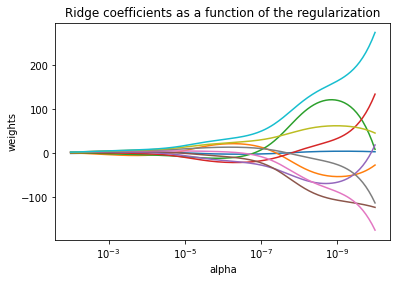

In [8]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')  #将alpha的值取对数便于画图
ax.set_xlim(ax.get_xlim()[::-1])  #翻转x轴的大小方向，让alpha从大到小显示 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()